# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import time

# import stats to determine linear regression
from scipy.stats import linregress

# import citipy to find nearest country
from citipy import citipy

# Import API key
from api_keys import g_key
from api_keys import weather_api_key

# create output file destination
output_data_file = "../output_data/cities.csv"

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
latitude_longitude = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1400)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1400)
latitude_longitude = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in latitude_longitude:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# create blank list for city data
city_data = []
units = "imperial"
count = 0

print("Beginning Data Retrieval     ")
print("-----------------------------")

for city in cities:
    city_url=f"{base_url}appid={weather_api_key}&q={city}&units={units}"

    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather['coord']['lat']
        city_lon = city_weather['coord']['lon']
        city_max = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_cloudiness = city_weather['clouds']['all']
        city_wspeed = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        city_data.append({"City":city,
                            "Lat":city_lat,
                            "Lng":city_lon,
                            "Max Temp":city_max,
                            "Humidity":city_humidity,
                            "Cloudiness":city_cloudiness,
                            "Wind Speed":city_wspeed,
                            "Country": city_country,
                            "Date": city_date

                            })
        print(f"Processing Record {count} | {city}")
        count+=1
        
    except:
        print(f"{city}: City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 0 | donskoye
Processing Record 1 | rikitea
vaitupu: City not found. Skipping...
mys shmidta: City not found. Skipping...
Processing Record 2 | salvador
Processing Record 3 | saint anthony
Processing Record 4 | tafresh
Processing Record 5 | mabaruma
Processing Record 6 | kapaa
Processing Record 7 | subottsi
Processing Record 8 | macedo de cavaleiros
Processing Record 9 | lebu
Processing Record 10 | east london
Processing Record 11 | nikolskoye
Processing Record 12 | vaini
Processing Record 13 | khatanga
Processing Record 14 | sioux lookout
Processing Record 15 | talara
Processing Record 16 | pyu
Processing Record 17 | yerofey pavlovich
taolanaro: City not found. Skipping...
maimon: City not found. Skipping...
Processing Record 18 | taoudenni
Processing Record 19 | ponta do sol
Processing Record 20 | zhigansk
Processing Record 21 | broome
Processing Record 22 | buchanan
Processing Record 23 | clyde river
Proces

kamenskoye: City not found. Skipping...
Processing Record 225 | buin
Processing Record 226 | tuktoyaktuk
Processing Record 227 | great yarmouth
Processing Record 228 | salinas
Processing Record 229 | ballitoville
Processing Record 230 | ust-tsilma
Processing Record 231 | grand gaube
Processing Record 232 | vanavara
Processing Record 233 | coihaique
grand river south east: City not found. Skipping...
Processing Record 234 | longyearbyen
Processing Record 235 | liverpool
Processing Record 236 | kununurra
Processing Record 237 | frankfort
Processing Record 238 | pisco
Processing Record 239 | tasiilaq
Processing Record 240 | norsup
Processing Record 241 | vila velha
Processing Record 242 | envira
Processing Record 243 | kijang
Processing Record 244 | oussouye
Processing Record 245 | rongcheng
Processing Record 246 | charlestown
Processing Record 247 | pangnirtung
nizhneyansk: City not found. Skipping...
Processing Record 248 | kumluca
Processing Record 249 | pevek
Processing Record 250 | t

Processing Record 451 | kozhevnikovo
Processing Record 452 | khor
Processing Record 453 | katangli
Processing Record 454 | dehloran
Processing Record 455 | carballo
Processing Record 456 | ouango
halalo: City not found. Skipping...
Processing Record 457 | juegang
Processing Record 458 | bandipur
Processing Record 459 | gornopravdinsk
Processing Record 460 | maturin
Processing Record 461 | samarai
Processing Record 462 | canar
Processing Record 463 | kathu
Processing Record 464 | elizabeth city
Processing Record 465 | gualeguaychu
Processing Record 466 | qandala
Processing Record 467 | beinamar
Processing Record 468 | tigil
Processing Record 469 | sertania
Processing Record 470 | contamana
Processing Record 471 | ostersund
Processing Record 472 | nagapattinam
Processing Record 473 | kutum
Processing Record 474 | batamshinskiy
Processing Record 475 | yantal
Processing Record 476 | bhuj
Processing Record 477 | matara
Processing Record 478 | takoradi
Processing Record 479 | huarmey
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [105]:
# create dataframe
city_df = pd.DataFrame(city_data)

# export city data into a .csv
city_df.to_csv(output_data_file)

city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,makakilo city,21.3469,-158.0858,79.12,72,1,6.91,US,1627214968
1,hobyo,5.3505,48.5268,80.22,64,100,27.96,SO,1627214969
2,juneau,58.3019,-134.4197,55.85,96,90,0.00,US,1627214970
3,thompson,55.7435,-97.8558,45.99,81,94,5.12,CA,1627214805
4,prunisor,44.6094,22.9153,90.01,24,3,10.18,RO,1627214971


In [106]:
# make sure there are at least 500 observations

city_df.count()

City          501
Lat           501
Lng           501
Max Temp      501
Humidity      501
Cloudiness    501
Wind Speed    501
Country       501
Date          501
dtype: int64

In [107]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02
mean,19.892392,14.950829,72.418463,65.876248,54.173653,7.941876,1.627215e+09
std,32.749302,88.572376,15.213643,24.120710,38.095456,5.695617,1.353827e+02
min,-54.800000,-175.200000,33.350000,5.000000,0.000000,0.000000,1.627215e+09
25%,-6.416700,-58.736800,62.710000,49.000000,14.000000,3.850000,1.627215e+09
50%,21.650000,21.704900,74.340000,72.000000,61.000000,6.800000,1.627215e+09
75%,46.415400,88.397200,81.500000,84.000000,90.000000,10.710000,1.627215e+09
max,78.218600,178.416700,122.740000,100.000000,100.000000,35.990000,1.627215e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [108]:
# automating check in case random generator creates bad data
city_humidity100 = city_df.loc[city_df["Humidity"]> 100]

if city_humidity100.empty:
    print(f"There are no cities with humidity > 100%.")
else:
    # remove instances where humidity is > 100 if there are any 
    print(f"There are {len(city_humidity100)} cities with humidity > 100%.")
    city_df= city_df.loc[city_df["Humidity"]<= 100]

There are no cities with humidity > 100%.


In [109]:
# check new data
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02
mean,19.892392,14.950829,72.418463,65.876248,54.173653,7.941876,1.627215e+09
std,32.749302,88.572376,15.213643,24.120710,38.095456,5.695617,1.353827e+02
min,-54.800000,-175.200000,33.350000,5.000000,0.000000,0.000000,1.627215e+09
25%,-6.416700,-58.736800,62.710000,49.000000,14.000000,3.850000,1.627215e+09
50%,21.650000,21.704900,74.340000,72.000000,61.000000,6.800000,1.627215e+09
75%,46.415400,88.397200,81.500000,84.000000,90.000000,10.710000,1.627215e+09
max,78.218600,178.416700,122.740000,100.000000,100.000000,35.990000,1.627215e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [130]:
# Create scatter plot function

def scatter(x_axis, y_axis, title, x_label, y_label, png):

    ts = time.gmtime(city_df['Date'][0])
    # print(time.strftime("%m/%d/%Y %H:%M:%S", ts))
    datestr = time.strftime("%x",ts)

    # plot scatter graph
    plt.scatter(x_axis,y_axis, edgecolors= "black")

    # Show the grid lines 
    plt.grid(b=True, which='major', linestyle='-')

    # Add title, x and y labels
    plt.title(f"{title} ({datestr})")
    plt.ylabel(x_label)
    plt.xlabel(y_label)

    # add x and y limits
    plt.xlim(min(x_axis)-5,max(x_axis)+5)
    plt.ylim(min(y_axis)-5,max(y_axis)+5)

    # save the figure 
    plt.savefig(f"../output_data/{png}.png")

    # Display the plot 
    plt.show()


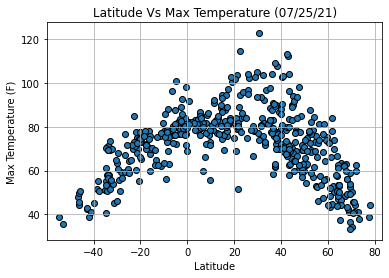

In [155]:
scatter(x_axis=city_df['Lat'], 
        y_axis=city_df['Max Temp'], 
        title="Latitude Vs Max Temperature", 
        x_label='Max Temperature (F)', 
        y_label='Latitude', 
        png='Latitude_vs_Max_Temp'
        )

## Latitude vs. Humidity Plot

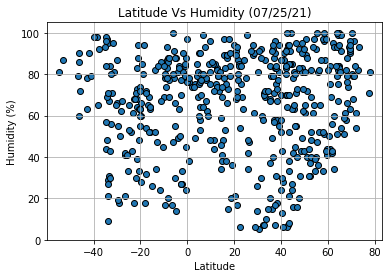

In [156]:
scatter(x_axis=city_df['Lat'], 
        y_axis=city_df['Humidity'], 
        title="Latitude Vs Humidity", 
        x_label='Humidity (%)', 
        y_label='Latitude', 
        png='Latitude_vs_Humidity'
        )


## Latitude vs. Cloudiness Plot

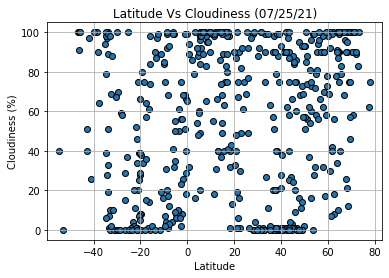

In [157]:
scatter(x_axis=city_df['Lat'], 
        y_axis=city_df['Cloudiness'], 
        title="Latitude Vs Cloudiness", 
        x_label='Cloudiness (%)', 
        y_label='Latitude', 
        png="Latitude_vs_Cloudiness"
        )


## Latitude vs. Wind Speed Plot

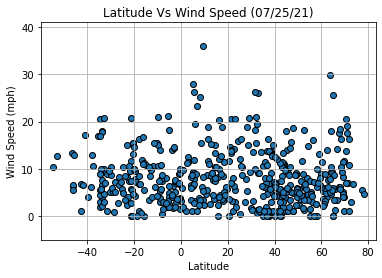

In [158]:
scatter(x_axis=city_df['Lat'], 
        y_axis=city_df['Wind Speed'], 
        title="Latitude Vs Wind Speed", 
        x_label='Wind Speed (mph)', 
        y_label='Latitude', 
        png="Latitude_vs_Wind_Speed"
        )

## Linear Regression

In [161]:
# Define plotting function

def LinearReg(x_axis, y_axis, x_label, y_label, lblpos, title, png):
    
    # determine line eqtn
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    print(f"The r-squared is: {rvalue}")
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # plot scatter graph
    plt.scatter(x_axis,y_axis)

    # add r squared and lin eqtn
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,lblpos, fontsize=15,color="red")

    # add x and y limits
    plt.xlim(min(x_axis)-5,max(x_axis)+5)
    plt.ylim(min(y_axis)-5,max(y_axis)+5)

    # Add title, x and y labels
    plt.title(f"{title}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # save plot
    plt.savefig(f"../output_data/{png}.png")
    # show plot
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [162]:
North = city_df.loc[city_df["Lat"] >= 0.0]
North.reset_index(inplace=True)

The r-squared is: -0.6197539259731386


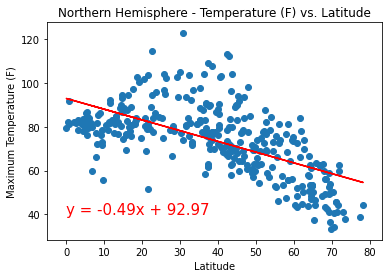

In [163]:
LinearReg(  x_axis=North['Lat'], 
            y_axis=North['Max Temp'], 
            x_label='Latitude', 
            y_label='Maximum Temperature (F)', 
            lblpos=(0,40),
            title='Northern Hemisphere - Temperature (F) vs. Latitude',
            png='North_Lat_vs_Max_Temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [164]:
South = city_df.loc[city_df["Lat"] < 0.0]
South.reset_index(inplace=True)

The r-squared is: 0.8003914155181379


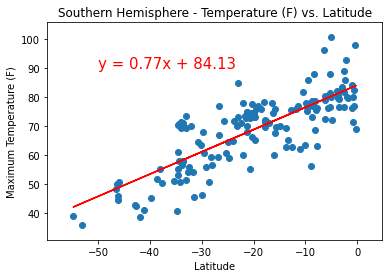

In [165]:
LinearReg(  x_axis=South['Lat'], 
            y_axis=South['Max Temp'], 
            x_label='Latitude', 
            y_label='Maximum Temperature (F)', 
            title='Southern Hemisphere - Temperature (F) vs. Latitude',
            lblpos=(-50,90),
            png='South_Lat_vs_Max_Temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0404723248925234


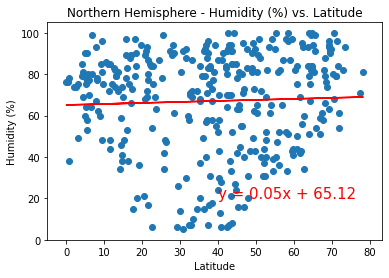

In [166]:
LinearReg(  x_axis=North['Lat'], 
            y_axis=North['Humidity'], 
            x_label='Latitude', 
            y_label='Humidity (%)', 
            title='Northern Hemisphere - Humidity (%) vs. Latitude',
            lblpos=(40,20),
            png='North_Lat_vs_Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.053288363973093895


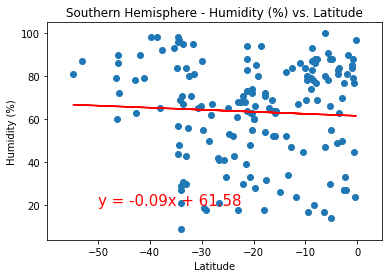

In [167]:
LinearReg(  x_axis=South['Lat'], 
            y_axis=South['Humidity'], 
            x_label='Latitude', 
            y_label='Humidity (%)',
            title='Southern Hemisphere - Humidity (%) vs. Latitude', 
            lblpos=(-50,20),
            png='South_Lat_vs_Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.00718509672692218


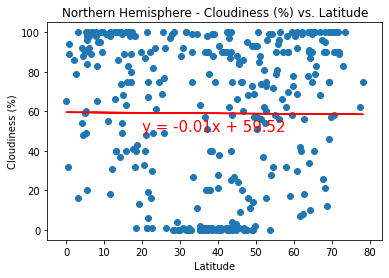

In [168]:
LinearReg(  x_axis=North['Lat'], 
            y_axis=North['Cloudiness'], 
            x_label='Latitude', 
            y_label='Cloudiness (%)', 
            title='Northern Hemisphere - Cloudiness (%) vs. Latitude', 
            lblpos=(20,50),
            png='North_Lat_vs_Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.13251431218604978


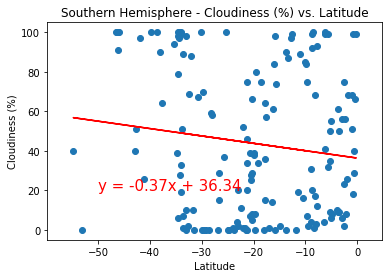

In [169]:
LinearReg(  x_axis=South['Lat'], 
            y_axis=South['Cloudiness'], 
            x_label='Latitude', 
            y_label='Cloudiness (%)', 
            title='Southern Hemisphere - Cloudiness (%) vs. Latitude', 
            lblpos=(-50,20),
            png='South_Lat_vs_Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.09840637277178771


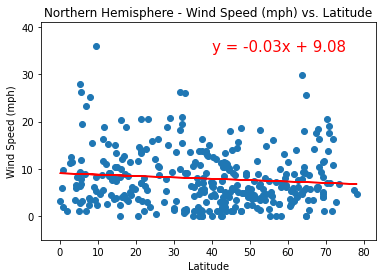

In [170]:
LinearReg(  x_axis=North['Lat'], 
            y_axis=North['Wind Speed'], 
            x_label='Latitude', 
            y_label='Wind Speed (mph)', 
            title='Northern Hemisphere - Wind Speed (mph) vs. Latitude', 
            lblpos=(40,35),
            png='North_Lat_vs_Wind_Speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.12833483887393482


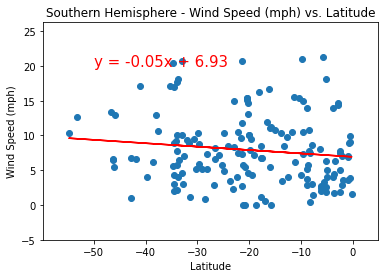

In [171]:
LinearReg(  x_axis=South['Lat'], 
            y_axis=South['Wind Speed'], 
            x_label='Latitude', 
            y_label='Wind Speed (mph)', 
            title='Southern Hemisphere - Wind Speed (mph) vs. Latitude', 
            lblpos=(-50,20),
            png='South_Lat_vs_Wind_Speed')

In [ ]:
# Conclusion:

# 1) There appears to be a correlation between latitude and temperature as reflected by the R-squared values of -0.6 for the Northern Hemmisphere and 0.8 for the Southern Hemisphere. This is expected as temperature decreases the further away you are from the equator.

# 2) There apears little to no correlation between latitude and humidity as evidenced in the low R-squared values. Humidity depends on both the temperature and pressure of the system of interest. As results indicate that temperature appears to be correlated to latitude, this lack of correlation could be attributed to pressure not being correlated to the latitude.  

# 3) There appears to be no correlation between latitude and cloudiness as evidenced in the low R-squared values. This is in line with expectations as cloudiness relies on sunshine duration and is also impacted by climate change.   